INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.06492765826721482

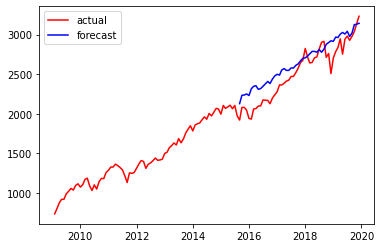

In [1]:
import pandas as pd
import pmdarima as pm
from sklearn.metrics import mean_absolute_percentage_error
from prophet import Prophet
import matplotlib.pyplot as plt
%store -r date_list
%store -r cpi_list
%store -r ppi_list
%store -r unemployed_ratio_list
%store -r update_sp500
prophet_case_sp500 = pd.DataFrame()
prophet_case_sp500['ds'] = date_list
prophet_case_sp500['cpi'] = cpi_list
prophet_case_sp500['ppi'] = ppi_list
prophet_case_sp500['unemployment_ratio'] = unemployed_ratio_list
prophet_case_sp500_update = pd.concat([prophet_case_sp500, update_sp500], axis=1).dropna()
prophet_case_sp500_update['ds'] = pd.to_datetime(prophet_case_sp500_update['ds'])
prophet_case_sp500_update.rename(columns={"Price": "y"}, inplace = True)
modified_sp500 = prophet_case_sp500_update.loc[prophet_case_sp500_update['ds'] >= '2009-01-31']
final_find_sp500_case_optimized = modified_sp500.loc[modified_sp500['ds'] <= '2019-12-31']
train=final_find_sp500_case_optimized[(final_find_sp500_case_optimized['ds'] <= '2015-08-31')]
test=final_find_sp500_case_optimized[(final_find_sp500_case_optimized['ds'] > '2015-08-31')]
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-15', 'lower_window': 0, 'ds_upper': '2020-03-22'},
])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
m3_without_variables = Prophet(mcmc_samples=600, holidays=lockdowns)
m3_without_variables.fit(train)
forecast1 = m3_without_variables.predict(test)
final_df_1 = pd.concat((forecast1['yhat'], test.reset_index()), axis=1)
plt.plot(final_find_sp500_case_optimized['ds'], final_find_sp500_case_optimized['y'], color='red', label='actual')
plt.plot(final_df_1['ds'], final_df_1['yhat'], color='blue', label='forecast')
plt.legend()
mean_absolute_percentage_error(final_df_1['y'], final_df_1['yhat'])

In [2]:
m_data_prophet_no_variable_holiday = final_df_1
%store m_data_prophet_no_variable_holiday

Stored 'm_data_prophet_no_variable_holiday' (DataFrame)
